#**Predicting the smartphone sales using ML Alogrithms**

Importing libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading the Dataset

In [19]:
data=pd.read_csv("/content/smartphones.csv")

In [20]:
data.shape

(980, 22)

In [21]:
data.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


## Data Preprocessing

In [22]:
data.columns

Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

#Data Cleaning

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [24]:
data.isnull().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

In [25]:
data['avg_rating'].fillna(method='ffill', inplace=True)
data['processor_brand'].fillna(method='ffill', inplace=True)
data['num_cores'].fillna(method='ffill', inplace=True)
data['processor_speed'].fillna(method='ffill', inplace=True)
data['battery_capacity'].fillna(method='ffill', inplace=True)
data['fast_charging'].fillna(method='ffill', inplace=True)
data['os'].fillna(method='ffill', inplace=True)
data['primary_camera_front'].fillna(method='ffill', inplace=True)

In [26]:
data.isnull().sum()

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                2
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

In [27]:
replacement_value=0
data['fast_charging'].fillna(replacement_value,inplace=True)

In [28]:
data.fast_charging.isnull().sum()

0

#Analyzing

#**Market Analysis**: Analyze the market share and popularity of different mobile phone brands and models.

In [30]:
data1=data.head(100)

In [31]:
brand_market_share = data1['brand_name'].value_counts(normalize=True) * 100

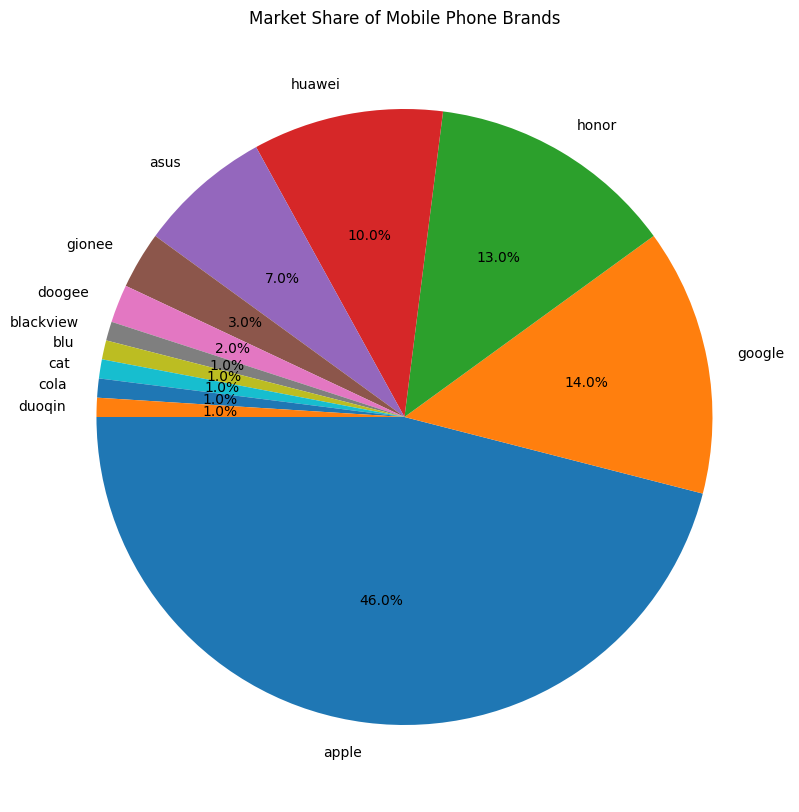

In [32]:
plt.figure(figsize=(15, 10))
plt.pie(brand_market_share, labels=brand_market_share.index, autopct='%.1f%%', startangle=180)
plt.title('Market Share of Mobile Phone Brands')
plt.show()


In [33]:
brand_model_popularity = data.groupby(['brand_name', 'model']).size().reset_index(name='popularity')
brand_model_popularity = brand_model_popularity.sort_values(by='popularity', ascending=False)


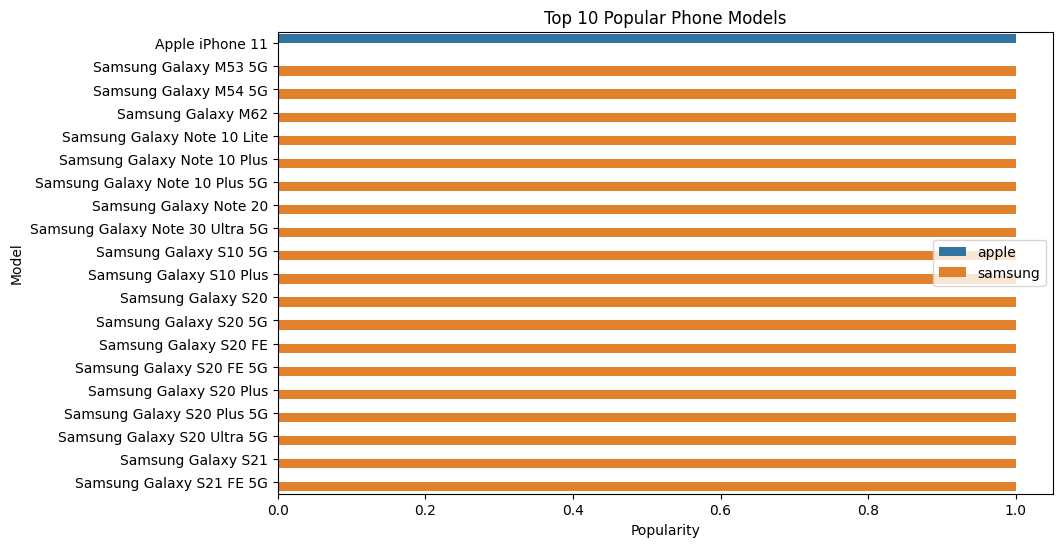

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_model_popularity.head(20), x='popularity', y='model', hue='brand_name')
plt.title('Top 10 Popular Phone Models')
plt.xlabel('Popularity')
plt.ylabel('Model')
plt.legend(loc='best')
plt.show()


The above pie chart provides the percentages of the top 100 mobiles from the dataset(i.e:46% of apple company mibiles are popular
The bar graph provides the brand name of the mobiles of top 20 mobiles from the dataset and Apple iphone 11 is the popular mobile

#**Price Segmentation**: Segment mobile phones based on price ranges and analyze how features vary across segments.

In [ ]:
price_ranges = [0,30000,60000,90000,120000, float('inf')]
price_labels = ['< 30000', '30000 - 60000', '60000 - 90000', '90000 - 120000', '120000']

data['price_segment'] = pd.cut(data['price'], bins=price_ranges, labels=price_labels)


In [ ]:
segmented_features = ['avg_rating', 'processor_brand', 'ram_capacity', 'battery_capacity', 'num_rear_cameras', 'screen_size','internal_memory']

segment_stats = data.groupby('price_segment')[segmented_features].mean()


<ipython-input-17-7e5861f46e30>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_stats = data.groupby('price_segment')[segmented_features].mean()


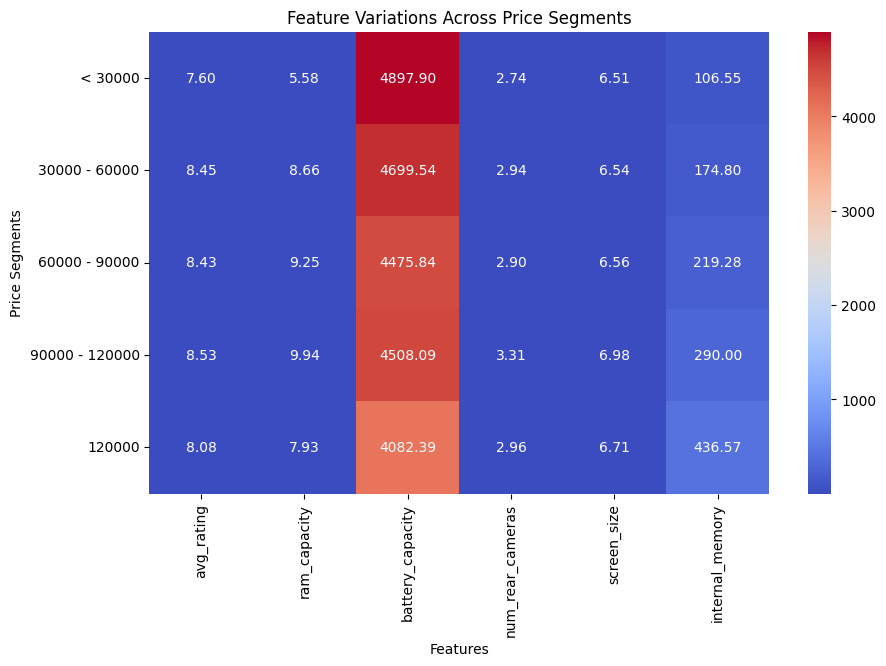

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(segment_stats, annot=True,fmt=".2f",cmap='coolwarm')
plt.title('Feature Variations Across Price Segments')
plt.xlabel('Features')
plt.ylabel('Price Segments')
plt.show()


#**5G Adoption**: Study the adoption and impact of 5G connectivity on mobile phone models.

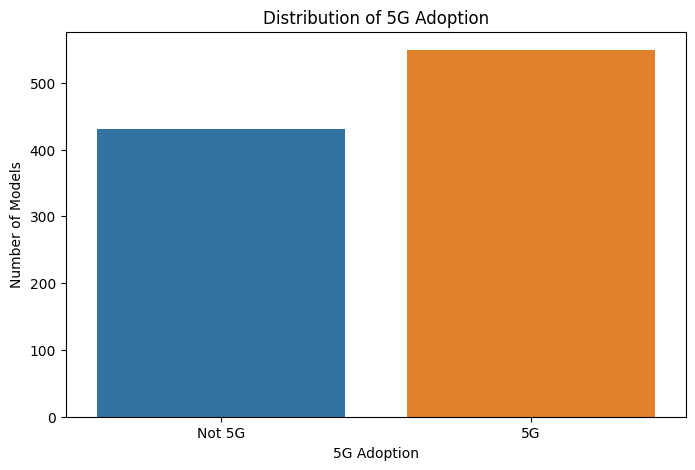

In [ ]:
# Count the number of models with 5G and without 5G
num_models_with_5G = data[data['5G_or_not'] == 'Yes']['model'].nunique()
num_models_without_5G = data[data['5G_or_not'] == 'No']['model'].nunique()

# Plot the distribution of 5G adoption
plt.figure(figsize=(8, 5))
sns.countplot(x='5G_or_not',data=data)
plt.xlabel('5G Adoption')
plt.ylabel('Number of Models')
plt.title('Distribution of 5G Adoption')
plt.xticks(ticks=[0, 1], labels=['Not 5G', '5G'])
plt.show()



In [ ]:

# Calculate average ratings and prices for models with and without 5G
avg_rating_with_5G = data[data['5G_or_not'] == 'Yes']['avg_rating'].mean()
avg_rating_without_5G = data[data['5G_or_not'] == 'No']['avg_rating'].mean()

avg_price_with_5G = data[data['5G_or_not'] == 'Yes']['price'].mean()
avg_price_without_5G = data[data['5G_or_not'] == 'No']['price'].mean()

print("Average Rating with 5G:", avg_rating_with_5G)
print("Average Rating without 5G:", avg_rating_without_5G)
print("Average Price with 5G:", avg_price_with_5G)
print("Average Price without 5G:", avg_price_without_5G)

Average Rating with 5G: nan
Average Rating without 5G: nan
Average Price with 5G: nan
Average Price without 5G: nan


#**Processor Performance**: Analyze how processor brand, number of cores, and speed impact user satisfaction and pricing.

In [ ]:
# Select relevant columns
processor_data = data[['processor_brand', 'num_cores', 'processor_speed', 'avg_rating', 'price']]

# Group data by processor brand and analyze the impact on average rating and price
processor_brand_analysis = processor_data.groupby('processor_brand').mean()

# Group data by number of cores and analyze the impact on average rating and price
num_cores_analysis = processor_data.groupby('num_cores').mean()

# Group data by processor speed range and analyze the impact on average rating and price
speed_bins = [0, 1.5, 2.5, 3.5, 4.5]  # Example speed bins in GHz
speed_labels = ['<1.5', '1.5-2.5', '2.5-3.5', '3.5-4.5']
processor_data['speed_range'] = pd.cut(processor_data['processor_speed'], bins=speed_bins, labels=speed_labels)
speed_analysis = processor_data.groupby('speed_range').mean()

<ipython-input-21-6c76b75e4609>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  num_cores_analysis = processor_data.groupby('num_cores').mean()
<ipython-input-21-6c76b75e4609>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processor_data['speed_range'] = pd.cut(processor_data['processor_speed'], bins=speed_bins, labels=speed_labels)
<ipython-input-21-6c76b75e4609>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only

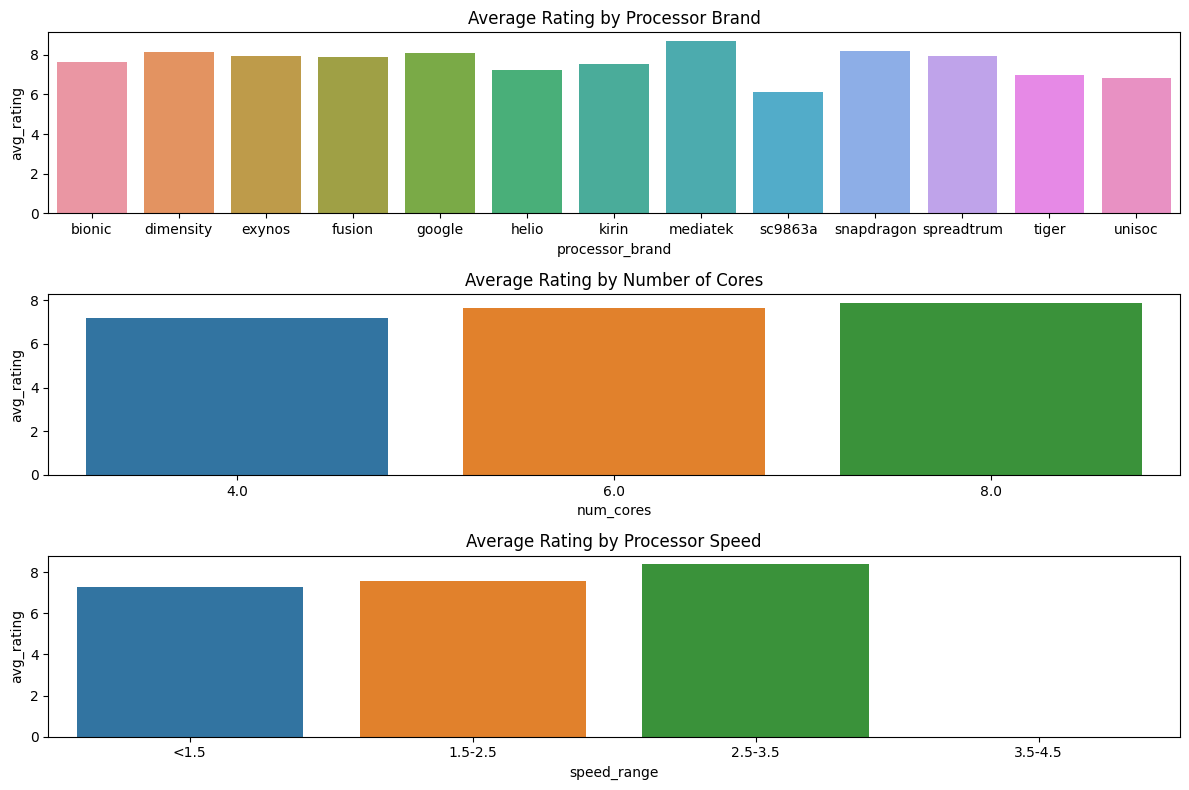

In [ ]:
#For the Avg_Rating
# Visualize the analysis
plt.figure(figsize=(12, 8))

# Processor Brand Analysis
plt.subplot(3, 1, 1)
sns.barplot(x=processor_brand_analysis.index, y='avg_rating', data=processor_brand_analysis)
plt.title('Average Rating by Processor Brand')

# Number of Cores Analysis
plt.subplot(3, 1, 2)
sns.barplot(x=num_cores_analysis.index, y='avg_rating', data=num_cores_analysis)
plt.title('Average Rating by Number of Cores')

# Processor Speed Analysis
plt.subplot(3, 1, 3)
sns.barplot(x=speed_analysis.index, y='avg_rating', data=speed_analysis)
plt.title('Average Rating by Processor Speed')

plt.tight_layout()
plt.show()

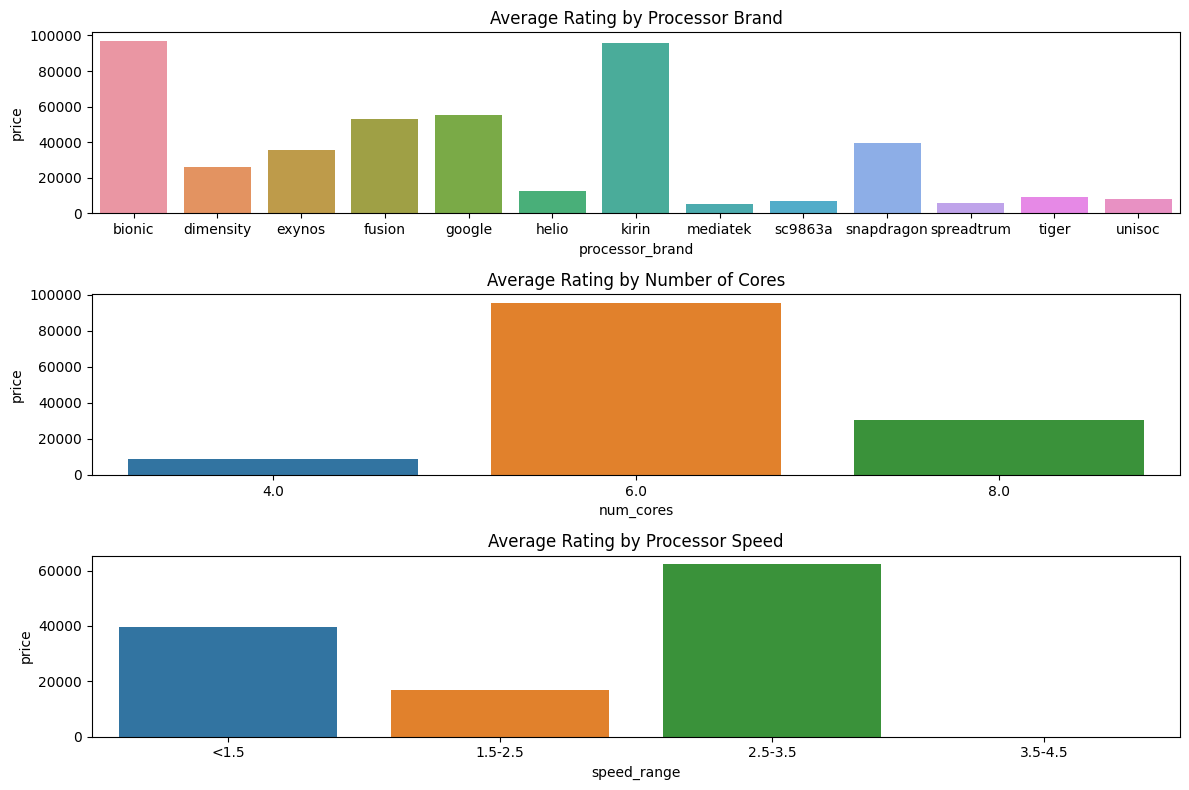

In [ ]:
#For the Price
# Visualize the analysis
plt.figure(figsize=(12, 8))

# Processor Brand Analysis
plt.subplot(3, 1, 1)
sns.barplot(x=processor_brand_analysis.index, y='price', data=processor_brand_analysis)
plt.title('Average Rating by Processor Brand')

# Number of Cores Analysis
plt.subplot(3, 1, 2)
sns.barplot(x=num_cores_analysis.index, y='price', data=num_cores_analysis)
plt.title('Average Rating by Number of Cores')

# Processor Speed Analysis
plt.subplot(3, 1, 3)
sns.barplot(x=speed_analysis.index, y='price', data=speed_analysis)
plt.title('Average Rating by Processor Speed')

plt.tight_layout()
plt.show()



#**Battery and Charging**: Study the relationship between battery capacity, fast charging, and user satisfaction.

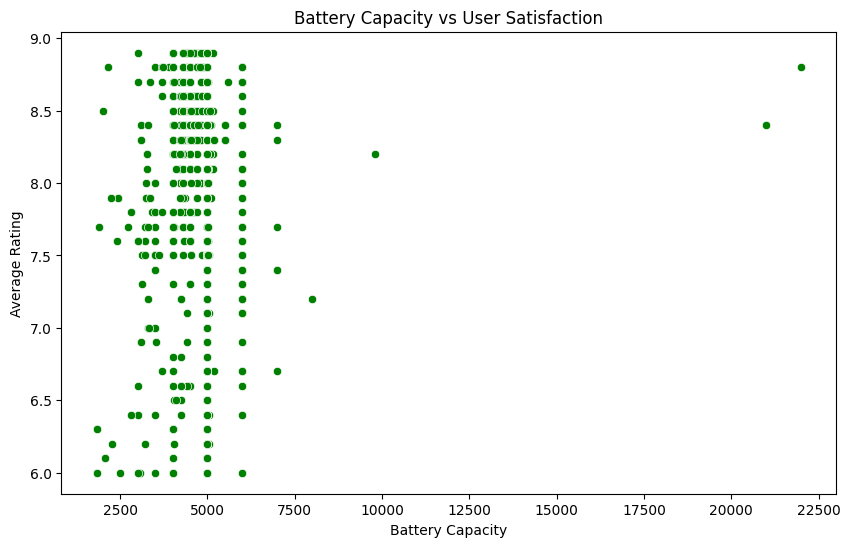

In [ ]:
# Scatter plot to visualize the relationship between battery capacity and user satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='battery_capacity', y='avg_rating', data=data,color='green')
plt.title('Battery Capacity vs User Satisfaction')
plt.xlabel('Battery Capacity')
plt.ylabel('Average Rating')
plt.show()

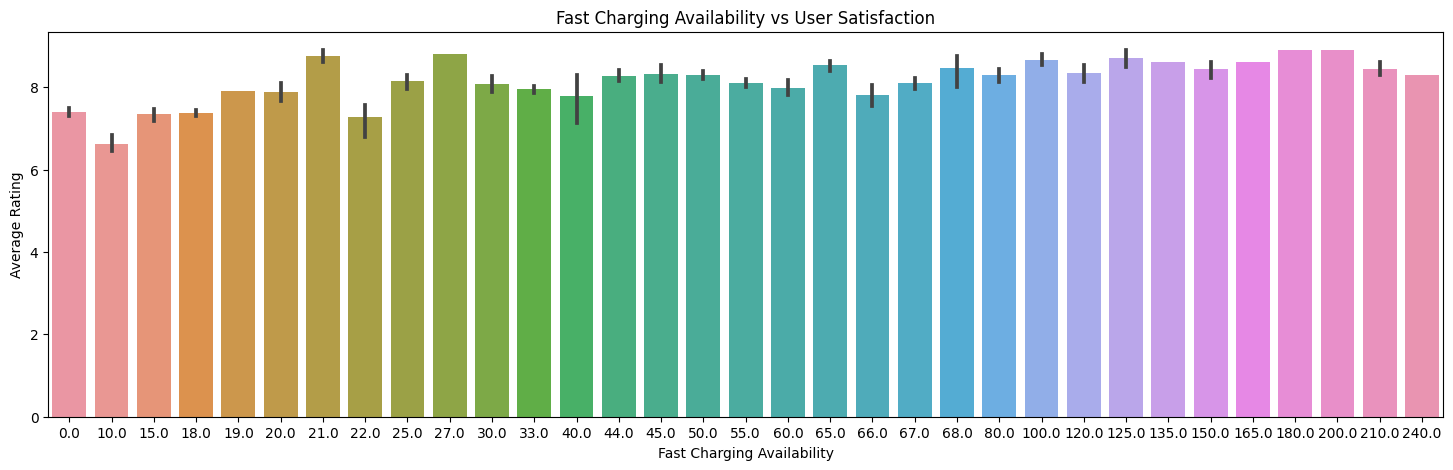

In [ ]:
# Bar plot to visualize the relationship between fast charging availability and user satisfaction
plt.figure(figsize=(18,5))
sns.barplot(x='fast_charging', y='avg_rating', data=data)
plt.title('Fast Charging Availability vs User Satisfaction')
plt.xlabel('Fast Charging Availability')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
# Step 3: Statistical Analysis
# Calculate the correlation between battery capacity,fast charging available and user satisfaction (avg_rating)
battery_corr = data['battery_capacity'].corr(data['avg_rating'])
fast_charging_corr = data['fast_charging_available'].corr(data['avg_rating'])

print(f'Correlation between battery capacity and user satisfaction: {battery_corr}')
print(f'Correlation between fast charging available and user satisfaction: {fast_charging_corr}')

Correlation between battery capacity and user satisfaction: 0.010100300339397064
Correlation between fast charging available and user satisfaction: 0.48711013083385846


#**Memory and Storage**: Analyze the impact of RAM and internal storage capacity on pricing and user ratings.



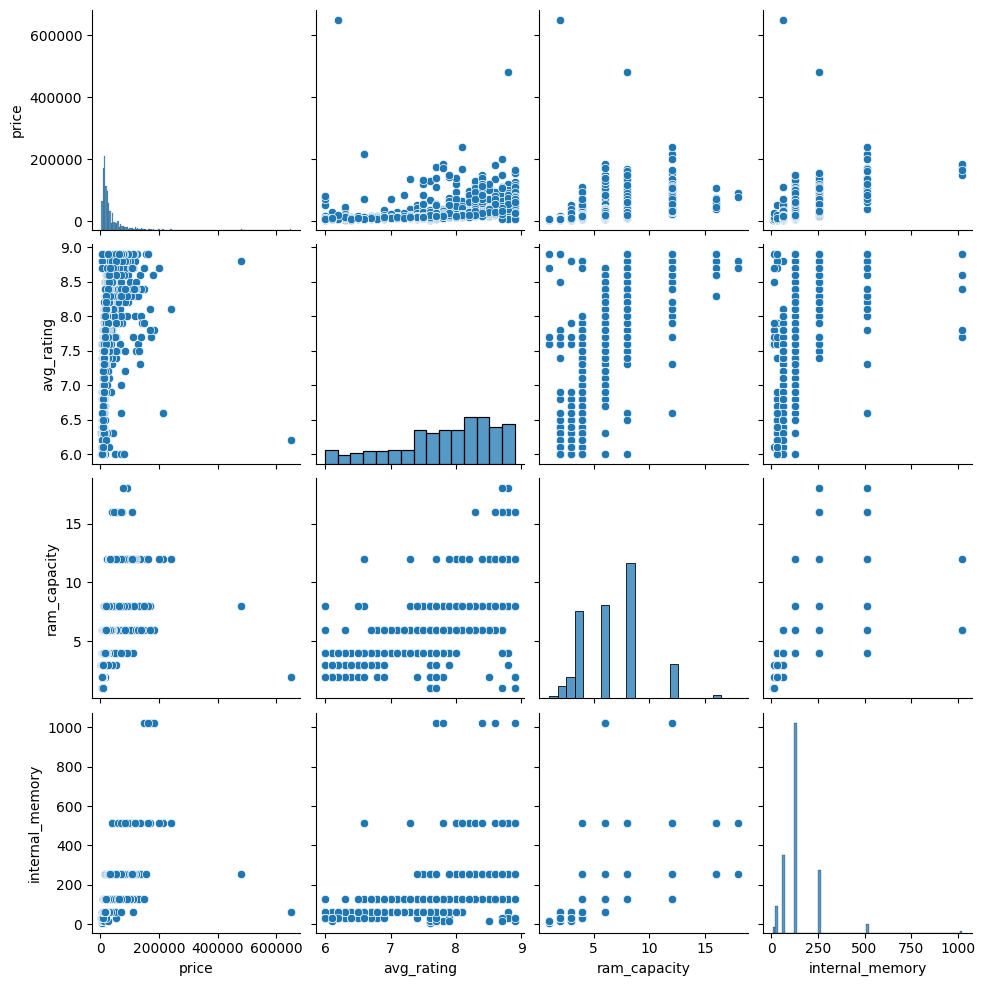

In [ ]:

# Visualize relationships between variables
sns.pairplot(data[['price', 'avg_rating', 'ram_capacity', 'internal_memory']])
plt.show()

# Analyze impact of RAM and internal storage on pricing and user ratings
ram_rating = data.groupby('ram_capacity')['avg_rating'].mean()
ram_price = data.groupby('ram_capacity')['price'].mean()

storage_rating = data.groupby('internal_memory')['avg_rating'].mean()
storage_price = data.groupby('internal_memory')['price'].mean()

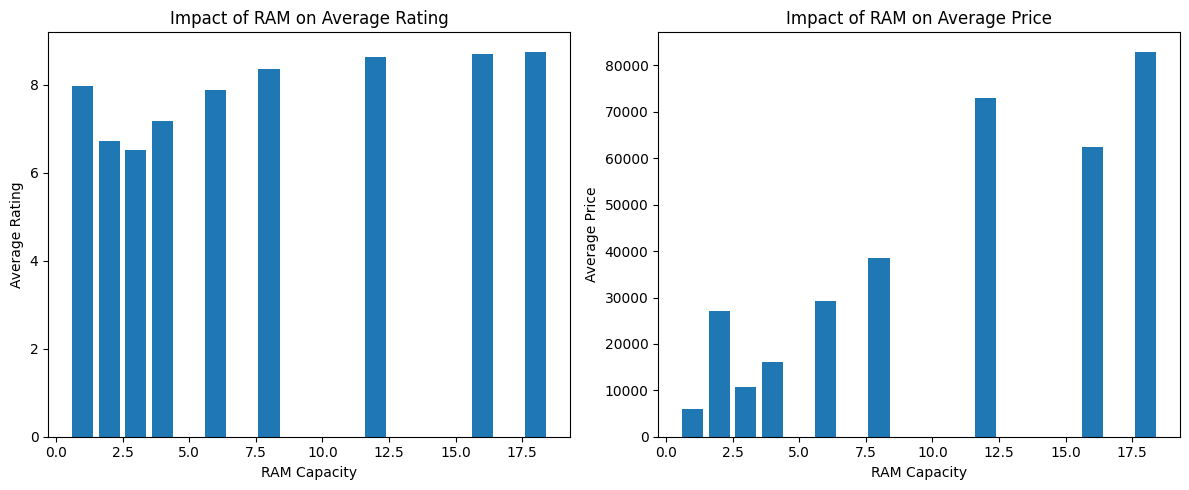

In [ ]:
#Visualize the impact of RAM on average rating and price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(ram_rating.index, ram_rating.values)
plt.title('Impact of RAM on Average Rating')
plt.xlabel('RAM Capacity')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
plt.bar(ram_price.index, ram_price.values)
plt.title('Impact of RAM on Average Price')
plt.xlabel('RAM Capacity')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

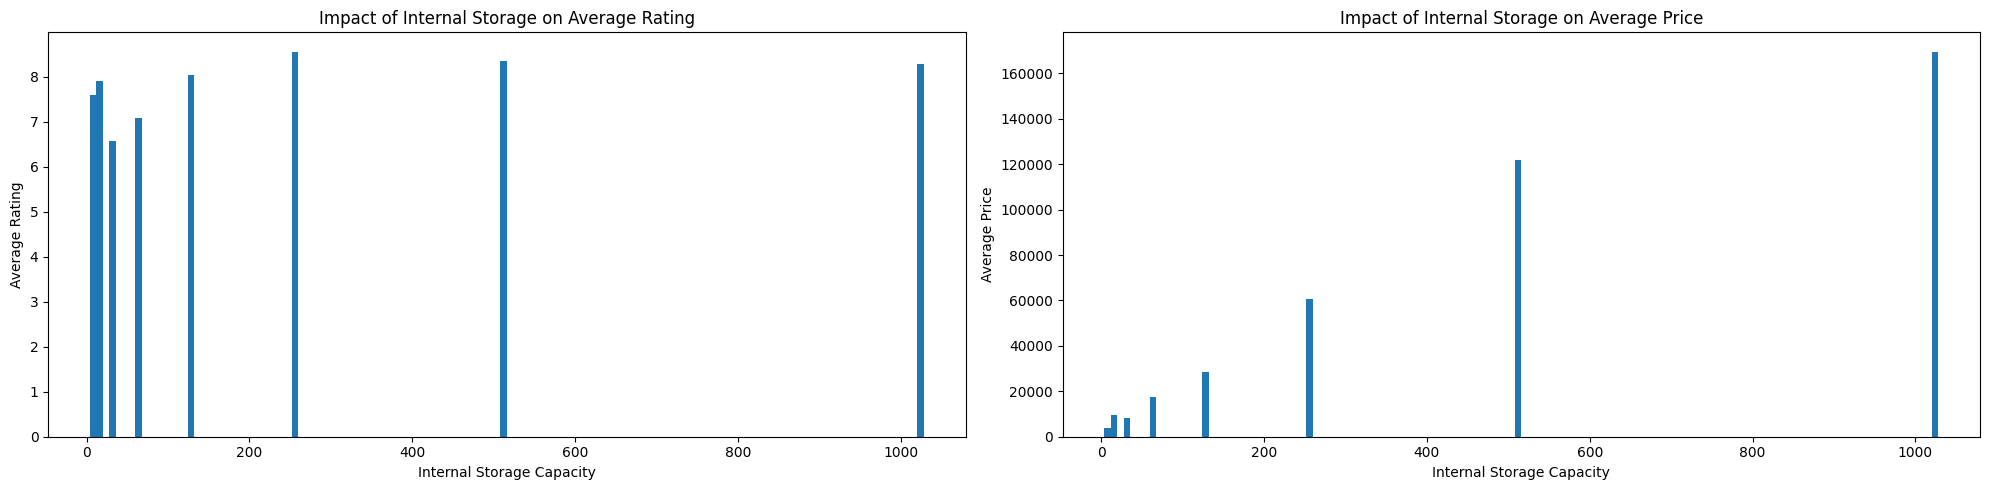

In [ ]:
# Visualize the impact of internal storage on average rating and price
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.bar(storage_rating.index, storage_rating.values,width=8)
plt.title('Impact of Internal Storage on Average Rating')
plt.xlabel('Internal Storage Capacity')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
plt.bar(storage_price.index, storage_price.values,width=8)
plt.title('Impact of Internal Storage on Average Price')
plt.xlabel('Internal Storage Capacity')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()


# **Screen Analysis**: Study the influence of screen size and refresh rate on user preferences and pricing.

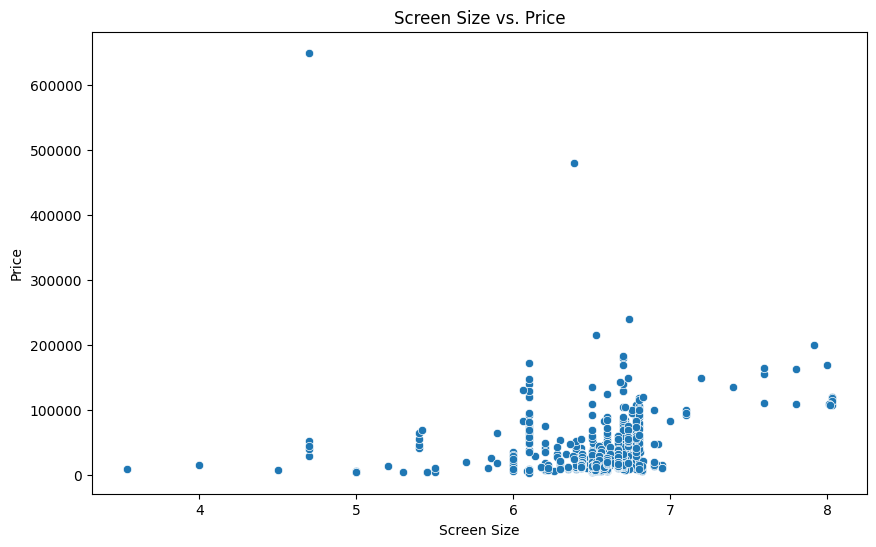

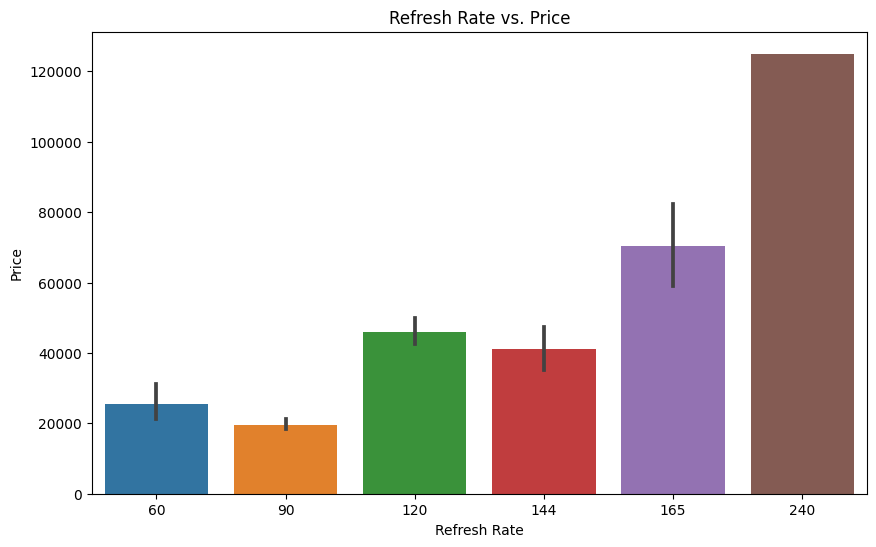

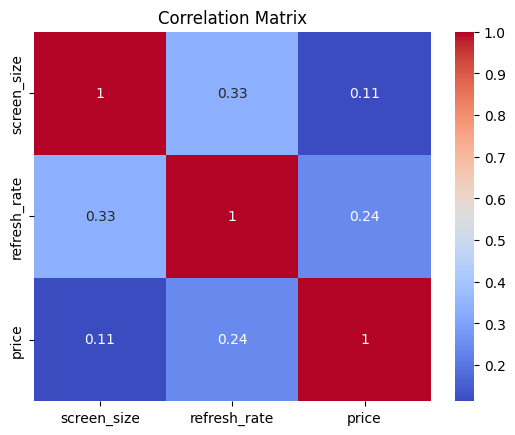

In [ ]:
#For the price analysis
# Scatter plot of screen size vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='screen_size', y='price', data=data)
plt.title('Screen Size vs. Price')
plt.xlabel('Screen Size')
plt.ylabel('Price')
plt.show()

# Scatter plot of refresh rate vs. price
plt.figure(figsize=(10, 6))
sns.barplot(x='refresh_rate', y='price', data=data)
plt.title('Refresh Rate vs. Price')
plt.xlabel('Refresh Rate')
plt.ylabel('Price')
plt.show()

# Create a correlation matrix to check relationships between numerical variables
correlation_matrix = data[['screen_size', 'refresh_rate', 'price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


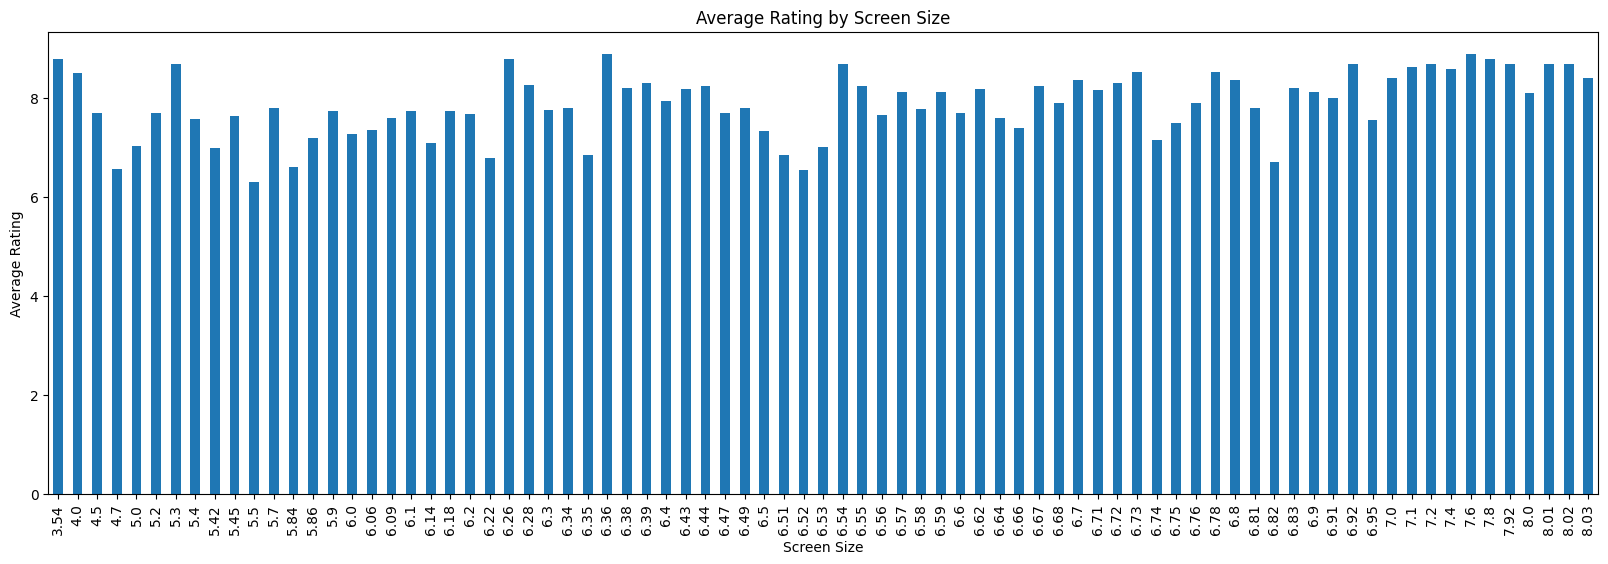

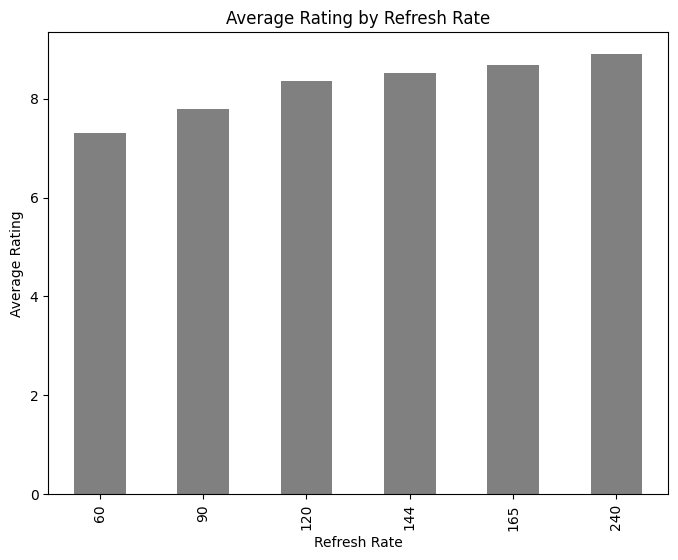

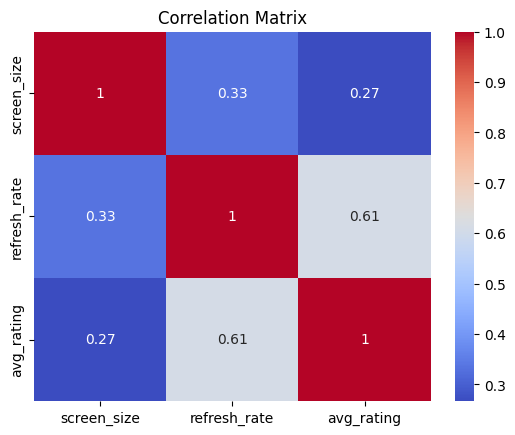

In [ ]:
#For the avg_rating
# Average rating based on screen size
avg_rating_by_screen = data.groupby('screen_size')['avg_rating'].mean()

# Average rating based on refresh rate
avg_rating_by_refresh = data.groupby('refresh_rate')['avg_rating'].mean()

# Create plots to visualize the average ratings
plt.figure(figsize=(20, 6))
avg_rating_by_screen.plot(kind='bar')
plt.title('Average Rating by Screen Size')
plt.xlabel('Screen Size')
plt.ylabel('Average Rating')
plt.show()

plt.figure(figsize=(8, 6))
avg_rating_by_refresh.plot(kind='bar',color='grey')
plt.title('Average Rating by Refresh Rate')
plt.xlabel('Refresh Rate')
plt.ylabel('Average Rating')
plt.show()
correlation_matrix = data[['screen_size', 'refresh_rate', 'avg_rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#**Camera Analysis**: Explore the impact of camera specifications on user reviews and pricing.

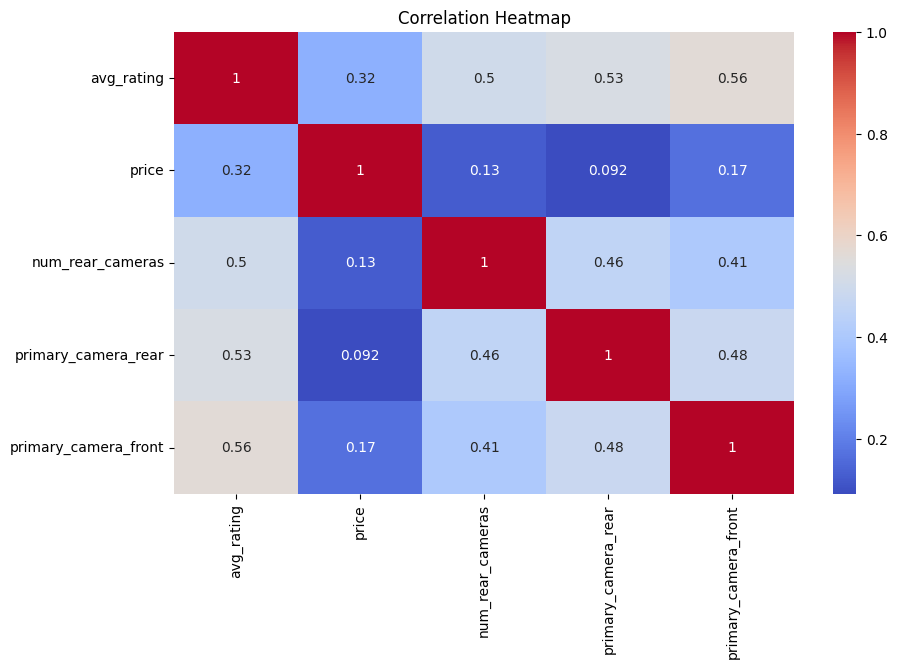

In [ ]:
# Correlation heatmap
corr_matrix = data[['avg_rating', 'price', 'num_rear_cameras', 'primary_camera_rear', 'primary_camera_front']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

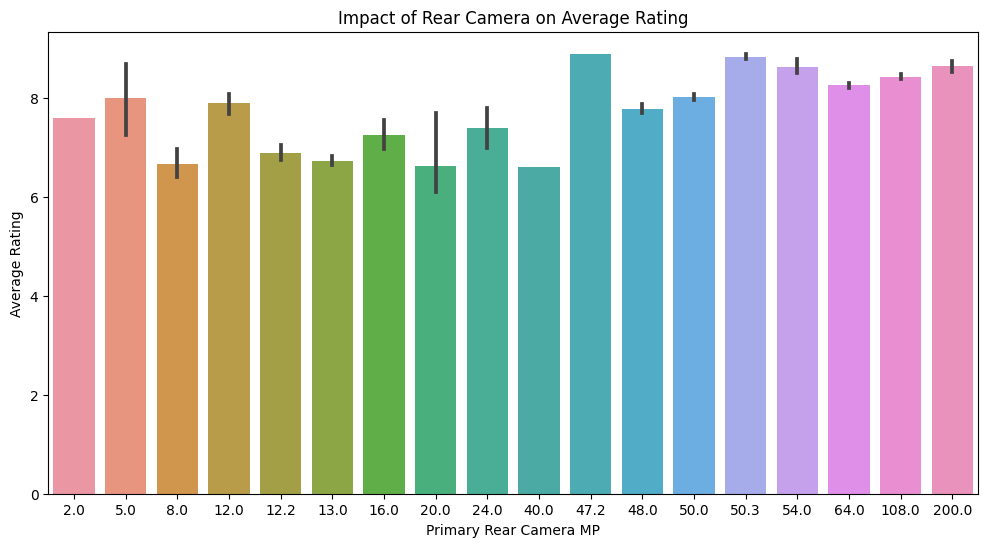

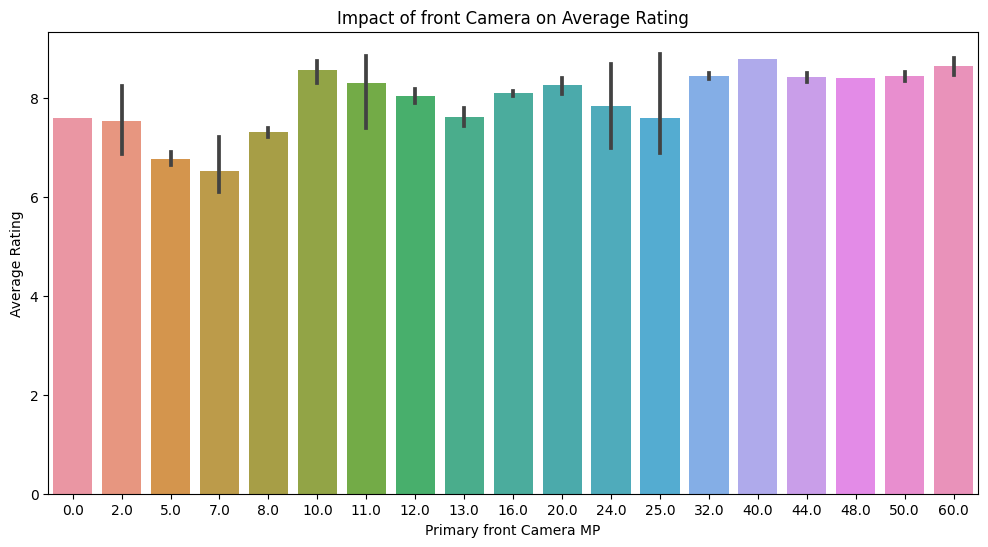

In [ ]:
#Bar plot between camera specifications and average rating
#For the Rare Camera
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_camera_rear', y='avg_rating', data=data)
plt.xlabel('Primary Rear Camera MP')
plt.ylabel('Average Rating')
plt.title('Impact of Rear Camera on Average Rating')
plt.show()
#For the Front Camera
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_camera_front', y='avg_rating', data=data)
plt.xlabel('Primary front Camera MP')
plt.ylabel('Average Rating')
plt.title('Impact of front Camera on Average Rating')
plt.show()

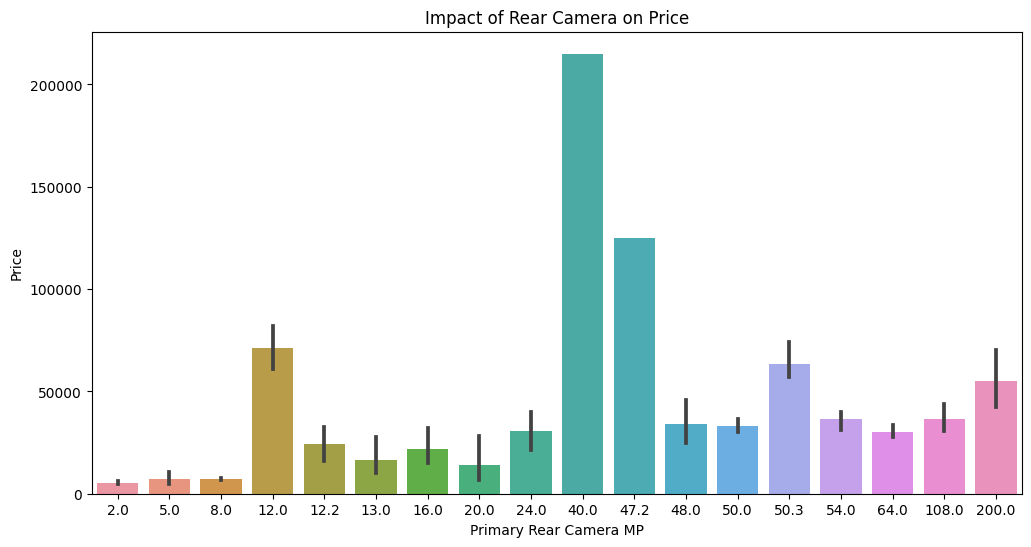

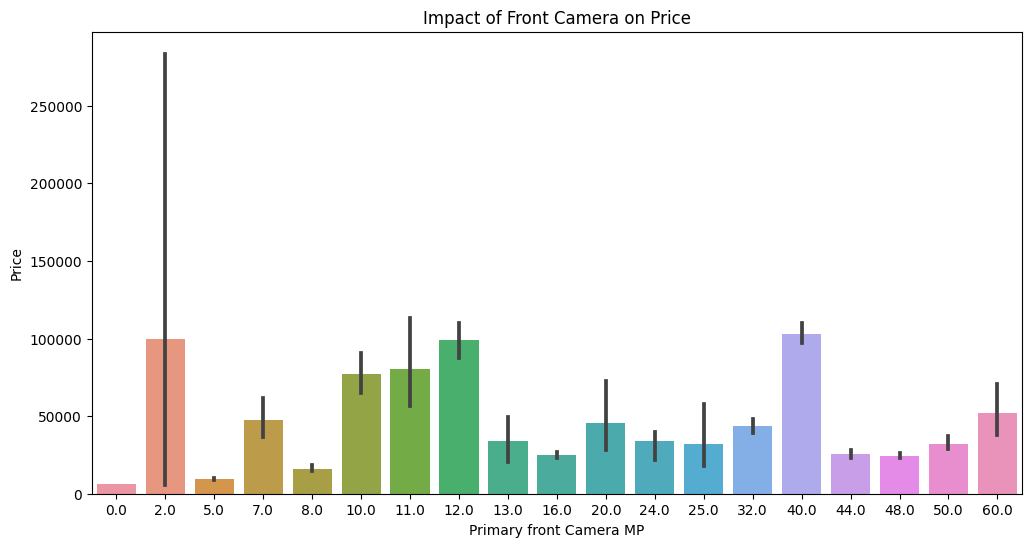

In [ ]:
# Bar plot between camera specifications and price
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_camera_rear', y='price', data=data)
plt.xlabel('Primary Rear Camera MP')
plt.ylabel('Price')
plt.title('Impact of Rear Camera on Price')
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_camera_front', y='price', data=data)
plt.xlabel('Primary front Camera MP')
plt.ylabel('Price')
plt.title('Impact of Front Camera on Price')
plt.show()

#**Operating Systems**: Analyze the popularity of different operating systems and their impact on user ratings.

In [ ]:
# Calculate popularity of different operating systems
os_popularity = data['os'].value_counts()

# Group by operating system and calculate average user rating
os_avg_rating = data.groupby('os')['avg_rating'].mean()

# Convert popularity and average ratings to DataFrames
os_popularity_df = pd.DataFrame({'Popularity': os_popularity})
os_avg_rating_df = pd.DataFrame({'Average Rating': os_avg_rating})

# Merge the two DataFrames
os_data = pd.merge(os_popularity_df, os_avg_rating_df, left_index=True, right_index=True)

# Display the data
print("Operating System Data:")
print(os_data)

Operating System Data:
         Popularity  Average Rating
android         919        7.853210
ios              46        7.654348
other            15        8.220000


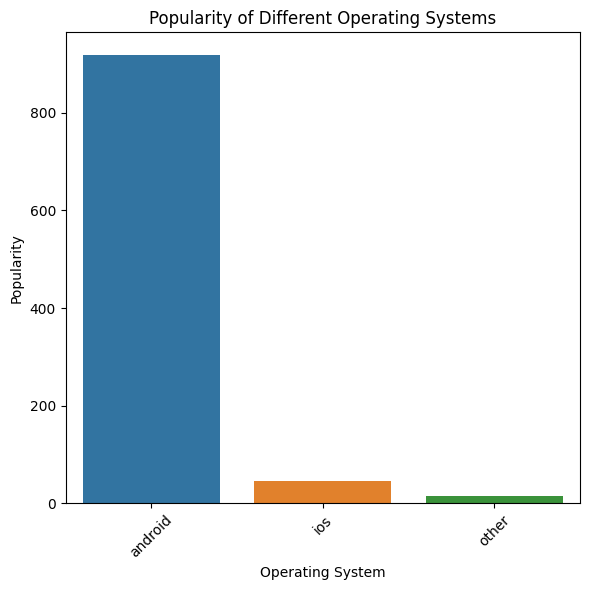

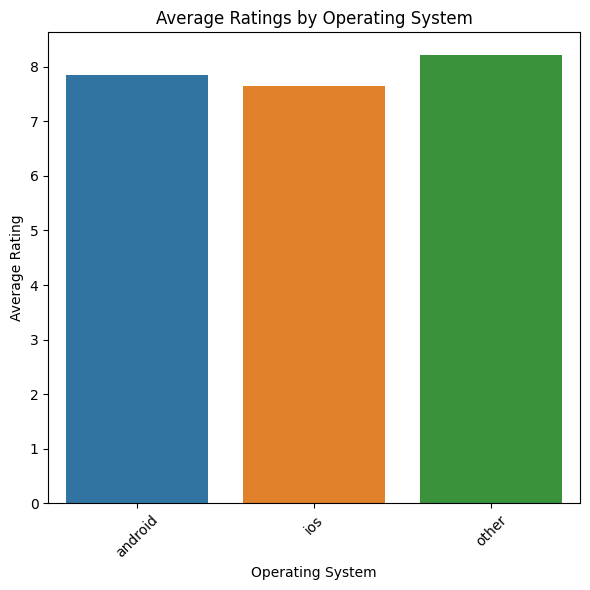

In [ ]:
# Create a bar chart for operating system popularity
plt.figure(figsize=(6, 6))
sns.barplot(x=os_data.index, y=os_data['Popularity'])
plt.xlabel('Operating System')
plt.ylabel('Popularity')
plt.title('Popularity of Different Operating Systems')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a bar chart for average ratings by operating system
plt.figure(figsize=(6, 6))
sns.barplot(x=os_data.index, y=os_data['Average Rating'])
plt.xlabel('Operating System')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Operating System')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#**Extended Memory**: Study the availability and usage of extended memory options.

In [ ]:

# Check the unique values in the 'extended_memory_available' column
extended_memory_counts = data['extended_memory_available'].value_counts()

# Calculate the average rating and price for smartphones with and without extended memory
avg_rating_extended = data[data['extended_memory_available'] == 'Yes']['avg_rating'].mean()
avg_rating_no_extended = data[data['extended_memory_available'] == 'No']['avg_rating'].mean()

avg_price_extended = data[data['extended_memory_available'] == 'Yes']['price'].mean()
avg_price_no_extended = data[data['extended_memory_available'] == 'No']['price'].mean()

# Print the results
print("Extended Memory Availability Counts:\n", extended_memory_counts)
print("\nAverage Rating with Extended Memory:", avg_rating_extended)
print("Average Rating without Extended Memory:", avg_rating_no_extended)
print("\nAverage Price with Extended Memory:", avg_price_extended)
print("Average Price without Extended Memory:", avg_price_no_extended)

Extended Memory Availability Counts:
 1    618
0    362
Name: extended_memory_available, dtype: int64

Average Rating with Extended Memory: nan
Average Rating without Extended Memory: nan

Average Price with Extended Memory: nan
Average Price without Extended Memory: nan


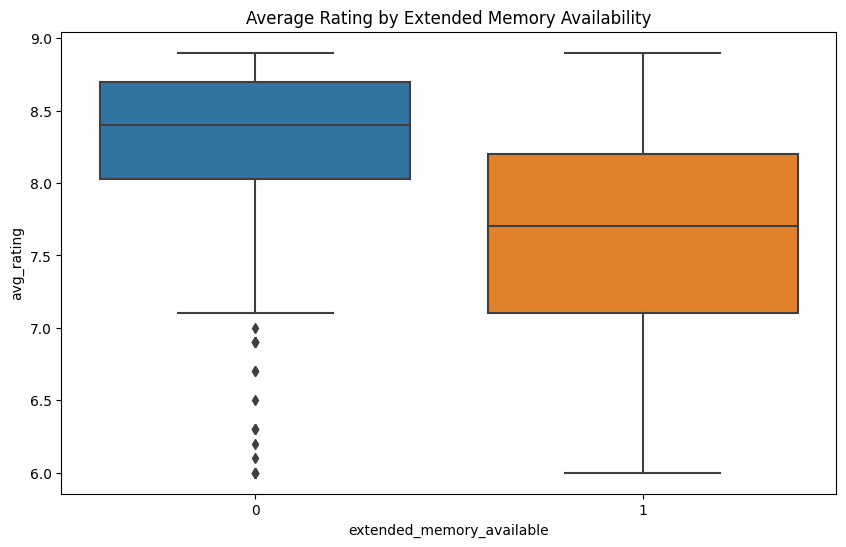

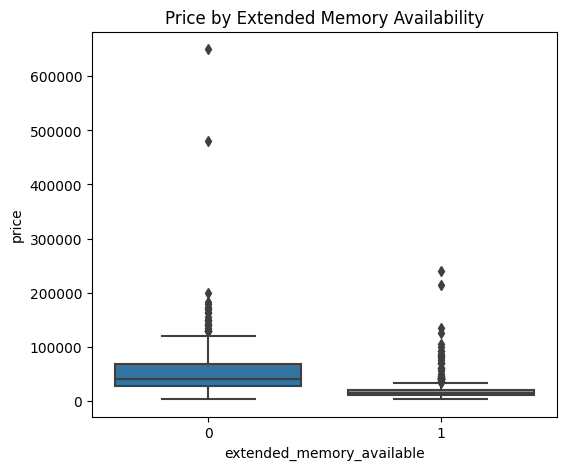

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='extended_memory_available', y='avg_rating', data=data)
plt.title('Average Rating by Extended Memory Availability')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x='extended_memory_available', y='price', data=data)
plt.title('Price by Extended Memory Availability')
plt.show()


#**Display Resolution**: Analyze how display resolution affects pricing and user satisfaction.

In [ ]:
# Select relevant columns
display_data = data[['resolution_height', 'resolution_width', 'price', 'avg_rating']]

# Calculate average price and average rating for each display resolution
avg_display_data = display_data.groupby(['resolution_height', 'resolution_width']).mean().reset_index()

Text(0, 0.5, 'Resolution Height')

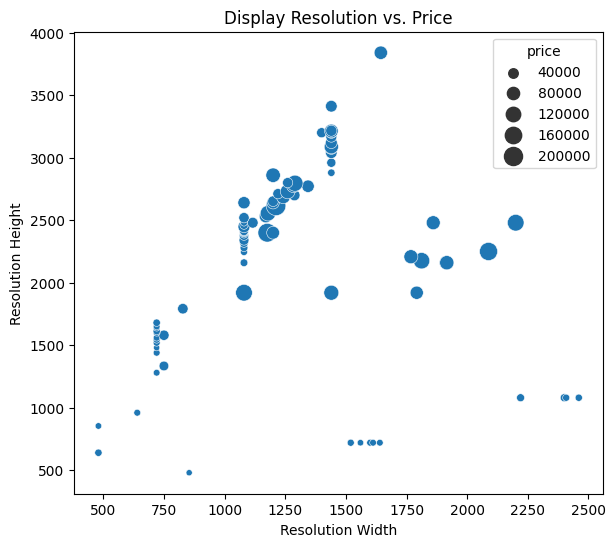

In [ ]:
# Visualization
plt.figure(figsize=(15, 6))

# Scatter plot for display resolution vs. price
plt.subplot(1, 2, 1)
sns.scatterplot(x='resolution_width', y='resolution_height', size='price', data=avg_display_data, sizes=(20, 200))
plt.title('Display Resolution vs. Price')
plt.xlabel('Resolution Width')
plt.ylabel('Resolution Height')

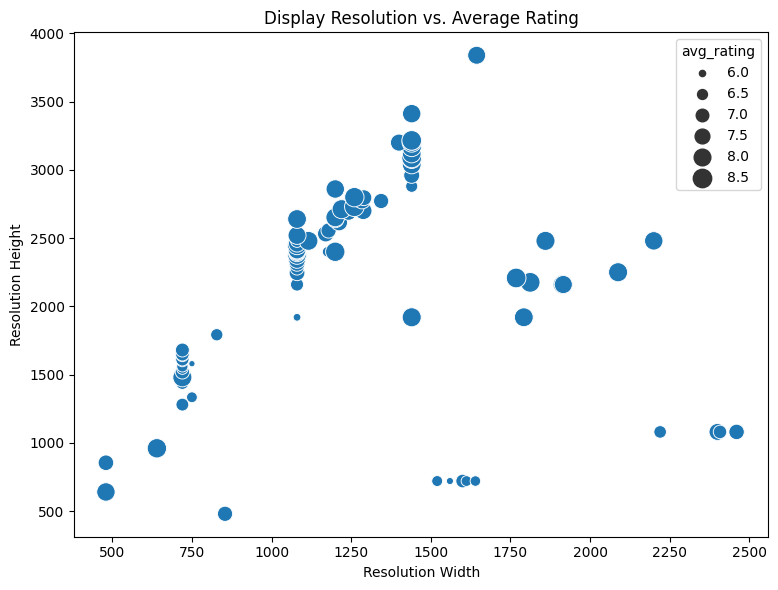

In [ ]:
# Visualization
plt.figure(figsize=(15, 6))

# Scatter plot for display resolution vs. average rating
plt.subplot(1, 2, 2)
sns.scatterplot(x='resolution_width', y='resolution_height', size='avg_rating', data=avg_display_data, sizes=(20, 200))
plt.title('Display Resolution vs. Average Rating')
plt.xlabel('Resolution Width')
plt.ylabel('Resolution Height')

plt.tight_layout()
plt.show()


#**Comparative Analysis**: Compare different mobile phone brands and models based on features,pricing, and ratings.

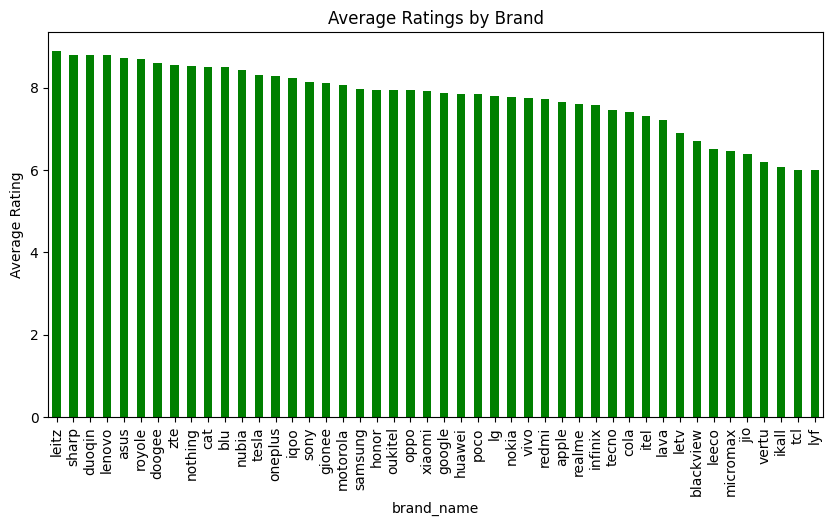

In [ ]:
# Group by brand and calculate the mean rating
avg_rating_by_brand = data.groupby('brand_name')['avg_rating'].mean()

# Plotting average ratings
plt.figure(figsize=(10,5))
avg_rating_by_brand.sort_values(ascending=False).plot(kind='bar',color='green')
plt.title('Average Ratings by Brand')
plt.ylabel('Average Rating')
plt.show()


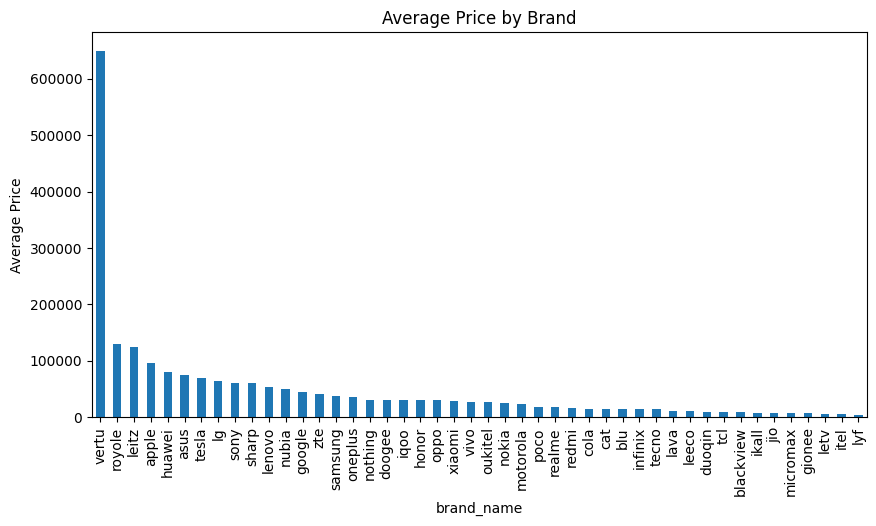

In [ ]:
# Group by brand and calculate the mean price
avg_price_by_brand = data.groupby('brand_name')['price'].mean()

# Plotting average prices
plt.figure(figsize=(10,5))
avg_price_by_brand.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Price by Brand')
plt.ylabel('Average Price')
plt.show()


<ipython-input-44-ad4a9d7170b9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_features_by_brand = data.groupby('brand_name').mean()


<Figure size 2500x500 with 0 Axes>

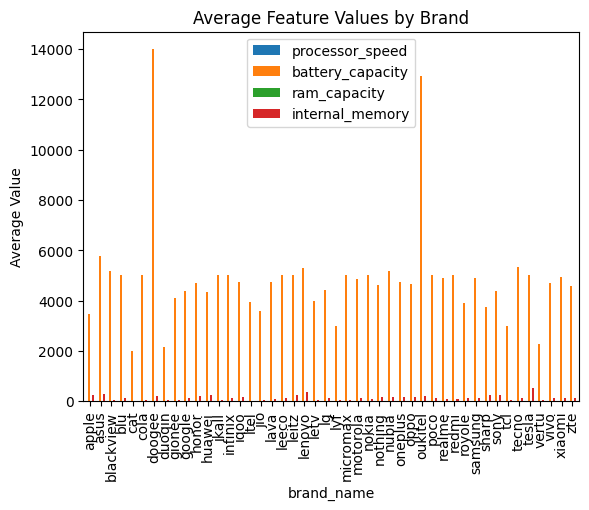

In [ ]:
# Group by brand and calculate the mean values of various features
avg_features_by_brand = data.groupby('brand_name').mean()

# Select specific features for analysis
selected_features = ['processor_speed', 'battery_capacity', 'ram_capacity', 'internal_memory']

# Plotting average values of selected features
plt.figure(figsize=(25,5))
avg_features_by_brand[selected_features].plot(kind='bar',width=0.75)
plt.title('Average Feature Values by Brand')
plt.ylabel('Average Value')
plt.show()


#Predictive Models

#**Predictive Models**: Build predictive models to estimate mobile phone prices based on specifications.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# # Load the dataset
# data = pd.read_csv('smartphones_dataset.csv')

# Select relevant features
features = ['avg_rating', '5G_or_not', 'processor_speed', 'battery_capacity', 'ram_capacity', 'internal_memory', 'screen_size', 'num_rear_cameras', 'resolution_height', 'resolution_width']

X = data[features]
y = data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
linear_reg_pred = linear_reg_model.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_r2_score = r2_score(y_test, linear_reg_pred)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)

mean_squared_error(y_test, linear_reg_pred)
from sklearn.metrics import r2_score
r2_score(y_test, linear_reg_pred)
accuracy=r2_score(y_test, linear_reg_pred)*100
print("accuracy of model %.2f"%accuracy)



accuracy of model 62.08


In [ ]:
# Train Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2_score = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

mean_squared_error(y_test, dt_pred)
from sklearn.metrics import r2_score
r2_score(y_test, dt_pred)
accuracy=r2_score(y_test, dt_pred)*100
print("accuracy of model %.2f"%accuracy)

accuracy of model 80.67


In [ ]:
# Train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2_score= r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

mean_squared_error(y_test, rf_pred)
from sklearn.metrics import r2_score
r2_score(y_test, rf_pred)
accuracy=r2_score(y_test, rf_pred)*100
print("accuracy of model %.2f"%accuracy)

accuracy of model 80.01


The accuracy score for the decision tree regression is higher so we need to consider the high accuracy score(i.e; Decision Tree Regression).

#**Consumer Insights**: Gain insights into consumer preferences and how they align with product features.

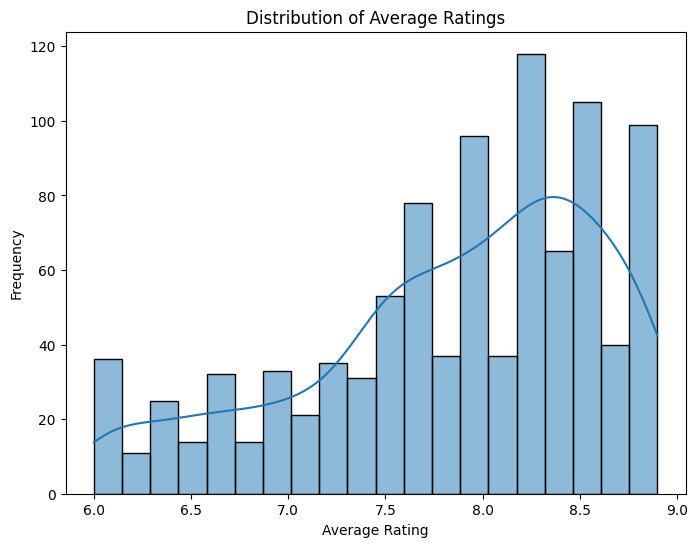

In [10]:
#Average rating
plt.figure(figsize=(8, 6))
sns.histplot(data['avg_rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


From the above hist plot Frequency vs Average rating we get to known that the frequency is high for the For above 8.0 rating

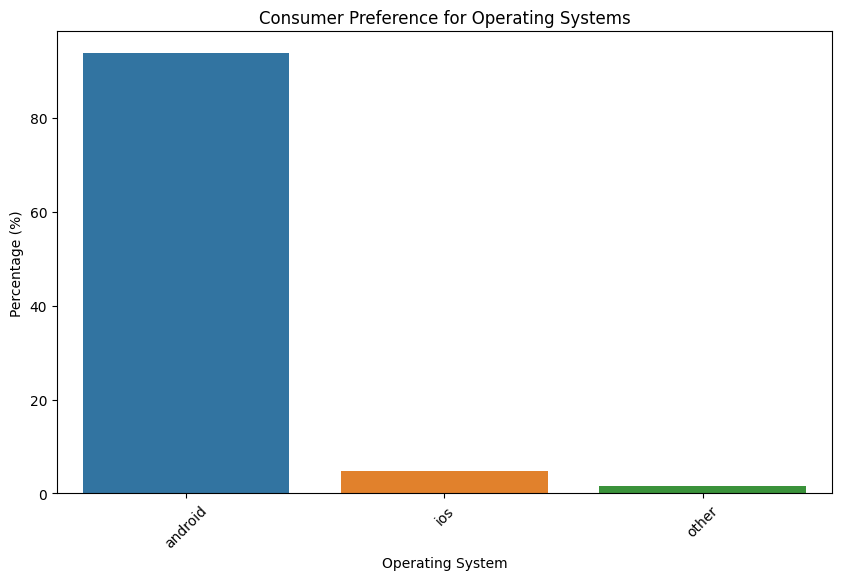

In [17]:
# Consumer preference for operating systems
os_preference = data['os'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=os_preference.index, y=os_preference.values)
plt.title('Consumer Preference for Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

From above graph we get to known that the Android operating system is mostly preferred by the consumers.

<ipython-input-11-4e348cc766be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


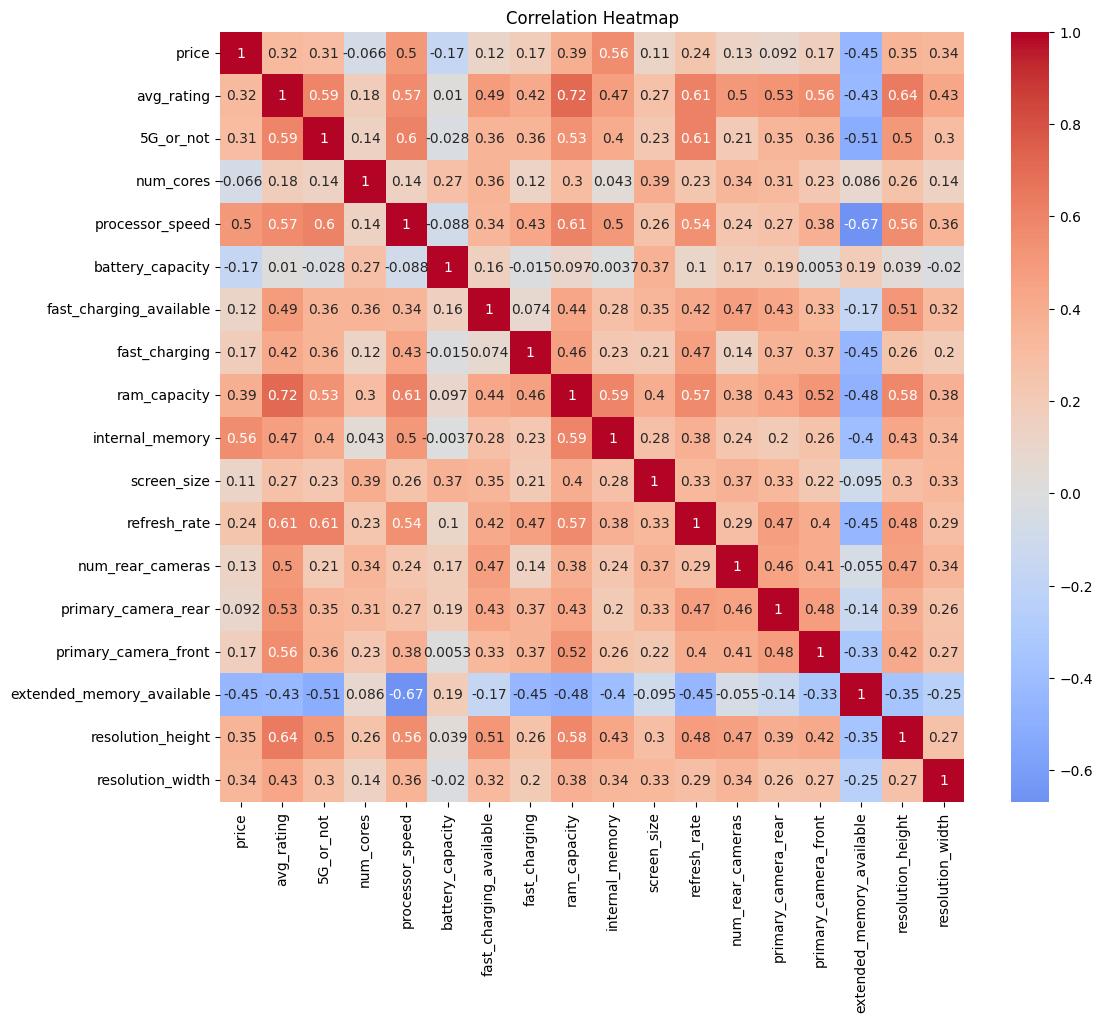

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


**Summary/Conclusion:**
Project Title:
Build models to predict sales of smartphones using ML Algorithms

Objective:
The project aims to Build models to predict sales figures based on features using machine learning techniques.

Project Steps:
Data Loading and Exploration:
Load the dataset. Explore the dataset's structure, summary statistics, and data distributions.

Data Preprocessing:
 Handle any missing data, outliers, or inconsistencies,data transformation.

Feature Engineering:
selecting important features to predict the smartphones sales

Data Splitting:
Split the dataset into training and testing sets. train_test_split is used to allocate a portion of the data for model training and evaluation.

Model Training:
Use a linear regression model to train a Regressor model on the preprocessed training data. Apply feature scaling using StandardScaler to normalize the feature values and linear regression,randomforest regressor,Decisiontree regressor.

Model Evaluation:
Calculate various evaluation metrics such as accuracy, to assess the model's performance. Use accuracy_score.

Model Interpretation:
Interpret the trained model to understand how different measurements contribute to the predicted class. Visualize feature importance using a coefficient plot to highlight the significance of individual features.

Conclusion:
Summarize the project's findings, including model performance, important features, and insights gained from the analysis.

Key Techniques and Tools Used:
Data preprocessing using pandas. Feature engineering to create new features. Splitting the data into training and testing sets using train_test_split. Model training using linear regression. Model evaluation using various metrics. Model interpretation through feature importance visualization.

In conclusion, this project showcased a complete  predicting smartphones sales, from data loading and preprocessing to model training, evaluation, and interpretation.Decision tree Regressor gives the highest accuracy and this regressor model is preferred for predicting smartphones sales.